# Assignment:

1. Perform some movie recommendations and analysis for user 2:
- How many movies has this user watched?
- Plot a bar chart of their movie ratings. The bar chart should be the counts of the number of unique ratings.
    - Hint: the `sort_index()` function from pandas might be helpful to make the bar plot look nicer.
- What are some of user 2's top movies?
    - Hint: to get the actual movie titles, you can use pandas [merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) function, although using the movie IDs is OK too.
- Find the most similar user in the movielens dataset to user 2 using at least 2 distance metrics. Be sure to use cosine distance as one of your choices.
- Recommend a few movies for user 2 using similarity metrics.
- Do the recommendations from this method make sense?
- Write a short analysis of the results, and justify which similarity metric(s) you used.

Optional challenges:
- Perform other analyses (e.g. EDA, visualizations) of the movies watched from this dataset, or from a bigger part of the dataset for the movielens dataset: https://grouplens.org/datasets/movielens/
- Add yourself as a user in the data with ratings for movies you've watched, and find recommendations for next movies to watch. 
- Use a more advanced collaborative or content-based recommender to make recommendations (e.g. using the surprise package in Python)
    - Try making predictions for user 2. How do they compare with our basic model?
    - Add your own movie ratings, or use another recommender dataset and add your own preferences, then get recommendations for yourself

In [1]:
#Perform some movie recommendations and analysis for user 2:
##How many movies has this user watched?
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#Perform some movie recommendations and analysis for user 2:
##How many movies has this user watched?
df_ratings = pd.read_csv('ratings.csv')
df_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [3]:
#Perform some movie recommendations and analysis for user 2:
##How many movies has this user watched?
df_movies = pd.read_csv('movies.csv', index_col='movieId')
df_movies

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
193585,Flint (2017),Drama


In [4]:
#Perform some movie recommendations and analysis for user 2:
##How many movies has this user watched?

#df_ratings['userId'].value_counts()
df_ratings.groupby('userId').size()

userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Length: 610, dtype: int64

In [5]:
#according to the previous line, user #2 has watched 29 movies

##Plot a bar chart of their movie ratings. The bar chart should be the counts of the number of unique ratings.
###Hint: the sort_index() function from pandas might be helpful to make the bar plot look nicer.

df_merged = df_ratings.merge(df_movies, left_on='movieId', right_on='movieId')
df_merged

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [6]:
unique_movie_counts = df_merged.groupby('title').size()

In [7]:
unique_movie_counts
#ax1 = df_userid2_sorted.plot.bar(x='title', y='rating', rot=90)

title
'71 (2014)                                    1
'Hellboy': The Seeds of Creation (2004)       1
'Round Midnight (1986)                        2
'Salem's Lot (2004)                           1
'Til There Was You (1997)                     2
                                             ..
eXistenZ (1999)                              22
xXx (2002)                                   24
xXx: State of the Union (2005)                5
¡Three Amigos! (1986)                        26
À nous la liberté (Freedom for Us) (1931)     1
Length: 9719, dtype: int64

In [8]:
df_merged['title'].value_counts()

Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
                                   ... 
Sex, Drugs & Taxation (2013)          1
Extraordinary Tales (2015)            1
Tomorrow (2015)                       1
Embrace of the Serpent (2016)         1
31 (2016)                             1
Name: title, Length: 9719, dtype: int64

Text(0.5, 1.0, 'Count of Unique Movie Ratings')

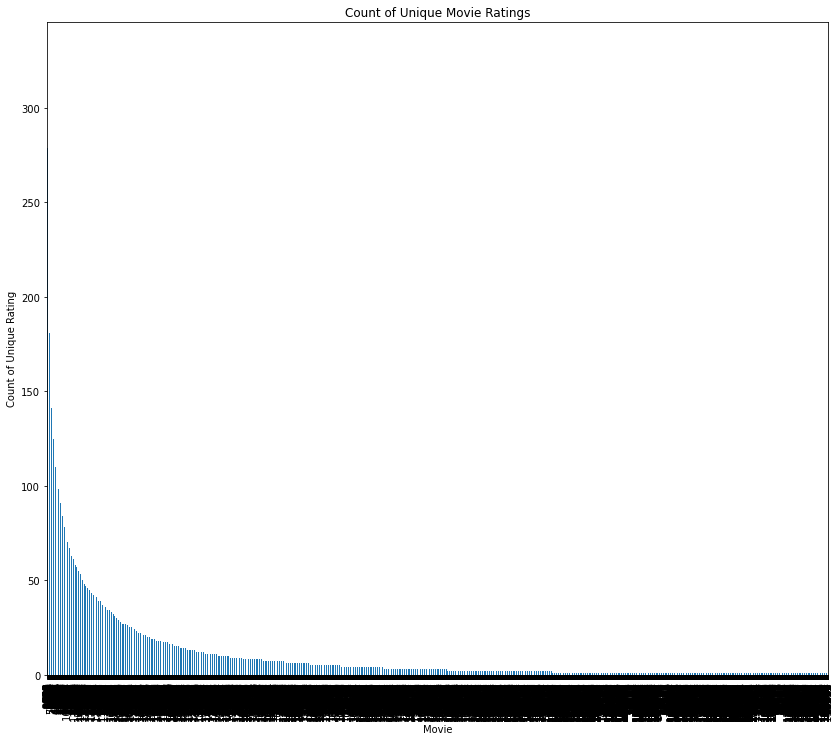

In [9]:
df_merged['movieId'].value_counts().plot(kind='bar', figsize=(14, 12), rot=90)
plt.xlabel("Movie")
plt.ylabel("Count of Unique Rating")
plt.title("Count of Unique Movie Ratings")

In [10]:
##Plot a bar chart of their movie ratings. The bar chart should be the counts of the number of unique ratings.
###Hint: the sort_index() function from pandas might be helpful to make the bar plot look nicer.

#the x-axis above is not readable, there are too many movies in this dataset
#just for fun, I will plot the movie ratings from user 2
df_userid2=df_merged[df_merged["userId"] == 2]
df_userid2

,userId,movieId,rating,timestamp,title,genres
2267,2,333,4.0,1445715029,Tommy Boy (1995),Comedy
15657,2,3578,4.0,1445714885,Gladiator (2000),Action|Adventure|Drama
16296,2,318,3.0,1445714835,"Shawshank Redemption, The (1994)",Crime|Drama
16613,2,1704,4.5,1445715228,Good Will Hunting (1997),Drama|Romance
16754,2,6874,4.0,1445714952,Kill Bill: Vol. 1 (2003),Action|Crime|Thriller
16885,2,8798,3.5,1445714960,Collateral (2004),Action|Crime|Drama|Thriller
16929,2,46970,4.0,1445715013,Talladega Nights: The Ballad of Ricky Bobby (2...,Action|Comedy
16957,2,48516,4.0,1445715064,"Departed, The (2006)",Crime|Drama|Thriller
17064,2,58559,4.5,1445715141,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX
17213,2,60756,5.0,1445714980,Step Brothers (2008),Comedy


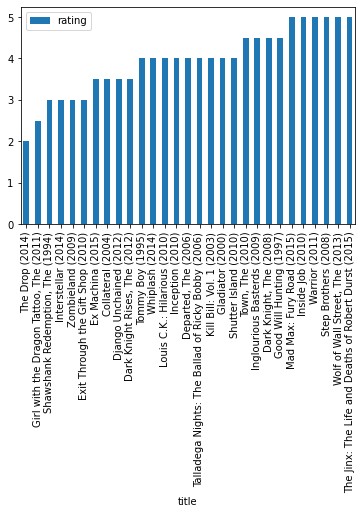

In [11]:
##Plot a bar chart of their movie ratings. The bar chart should be the counts of the number of unique ratings.
###Hint: the sort_index() function from pandas might be helpful to make the bar plot look nicer.
df_userid2_sorted = df_userid2.sort_values('rating')
ax = df_userid2_sorted.plot.bar(x='title', y='rating', rot=90)

In [12]:
##What are some of user 2's top movies?
df_userid2_topmovies = df_userid2[df_userid2["rating"] == 5.0]
df_userid2_topmovies

,userId,movieId,rating,timestamp,title,genres
17213,2,60756,5.0,1445714980,Step Brothers (2008),Comedy
17627,2,80906,5.0,1445715172,Inside Job (2010),Documentary
17648,2,89774,5.0,1445715189,Warrior (2011),Drama
17848,2,106782,5.0,1445714966,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama
18044,2,122882,5.0,1445715272,Mad Max: Fury Road (2015),Action|Adventure|Sci-Fi|Thriller
18091,2,131724,5.0,1445714851,The Jinx: The Life and Deaths of Robert Durst ...,Documentary


In [13]:
##Find the most similar user in the movielens dataset to user 2 using at least 2 distance metrics. Be sure to use cosine distance as one of your choices.
df_merged_ratings = df_merged.drop(columns=['timestamp', 'genres'])
#df_merged_ratings
wide = df_merged_ratings.pivot(index='userId', columns='movieId', values='rating')
wide.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
##Find the most similar user in the movielens dataset to user 2 using at least 2 distance metrics. Be sure to use cosine distance as one of your choices.
cor = wide.T.corr()
cor.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,NaN,0.079819,0.207983,0.268749,-0.291636,-0.118773,0.469668,0.918559,-0.037987,...,9.157371e-02,-1.597727e-16,-0.061503,-0.407556,-0.164871,0.066378,0.174557,0.268070,-0.175412,-0.032086
2,NaN,1.0,NaN,NaN,NaN,NaN,-0.991241,NaN,NaN,0.037796,...,-3.873468e-01,NaN,-1.000000,NaN,NaN,0.583333,NaN,-0.125000,NaN,0.623288
3,0.079819,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.433200,NaN,NaN,-0.791334,-0.333333,-0.395092,NaN,0.569562
4,0.207983,NaN,NaN,1.000000,-0.336525,0.148498,0.542861,0.117851,NaN,0.485794,...,-2.221127e-01,3.966413e-01,0.090090,-0.080296,0.400124,0.144603,0.116518,-0.170501,-0.277350,-0.043786
5,0.268749,NaN,NaN,-0.336525,1.000000,0.043166,0.158114,0.028347,NaN,-0.777714,...,2.719480e-16,1.533034e-01,0.234743,0.067791,-0.364156,0.244321,0.231080,-0.020546,0.384111,0.040582


In [15]:
##Find the most similar user in the movielens dataset to user 2 using at least 2 distance metrics. Be sure to use cosine distance as one of your choices.
cor.loc[2].sort_values(ascending=False)

userId
2      1.0
341    1.0
93     1.0
143    1.0
148    1.0
      ... 
602    NaN
604    NaN
605    NaN
607    NaN
609    NaN
Name: 2, Length: 610, dtype: float64

In [16]:
# so, users 341, 93, 143, and 148 are most similar to user 2

##Recommend a few movies for user 2 using similarity metrics.
##Do the recommendations from this method make sense?
rated_5_by_341_not_watched_by_2 = (wide.loc[341] == 5) & (wide.loc[2].isna())
print(wide.loc[2][rated_5_by_341_not_watched_by_2])
print(wide.loc[341][rated_5_by_341_not_watched_by_2])

movieId
1       NaN
59900   NaN
Name: 2, dtype: float64
movieId
1        5.0
59900    5.0
Name: 341, dtype: float64


In [17]:
##Recommend a few movies for user 2 using similarity metrics.
##Do the recommendations from this method make sense?
df_merged[df_merged["movieId"] == 1].head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [18]:
##Recommend a few movies for user 2 using similarity metrics.
##Do the recommendations from this method make sense?
df_merged[df_merged["movieId"] == 59900].head()

,userId,movieId,rating,timestamp,title,genres
67575,21,59900,3.0,1427558545,You Don't Mess with the Zohan (2008),Comedy
67576,41,59900,2.5,1458995086,You Don't Mess with the Zohan (2008),Comedy
67577,51,59900,3.0,1230932750,You Don't Mess with the Zohan (2008),Comedy
67578,52,59900,3.0,1468052115,You Don't Mess with the Zohan (2008),Comedy
67579,68,59900,1.0,1269123306,You Don't Mess with the Zohan (2008),Comedy


In [19]:
from scipy.spatial.distance import pdist, squareform

In [20]:
#So, we can recommend "Toy Story (1995)" 
# and "You Don't Mess with the Zohan (2008)" as movies for User with userId 2
# this was using the Pearson coefficient as the metric

#let's try using cosine distance as the metric

##Find the most similar user in the movielens dataset to user 2 using at least 2 distance metrics. Be sure to use cosine distance as one of your choices.
wide.fillna(-1, inplace=True)
cosine_distances = squareform(pdist(wide, metric='cosine'))
cosine_df = pd.DataFrame(cosine_distances, columns=wide.index, index=wide.index)
cosine_df.loc[2].sort_values()

userId
2      0.000000
442    0.042025
461    0.046059
189    0.046957
508    0.049443
         ...   
610    0.762312
448    0.817785
599    0.936812
474    0.975777
414    1.084648
Name: 2, Length: 610, dtype: float64

In [21]:
# we don't see user 341 at the top of the list using cosine distance, let's compared
cosine_df.loc[2].sort_values().loc[341]

0.0892952689103661

In [22]:
##Recommend a few movies for user 2 using similarity metrics.
##Do the recommendations from this method make sense?

rated_5_by_442_not_watched_by_2 = (wide.loc[442] >= 4.5) & (wide.loc[2] == -1)
print(wide.loc[2][rated_5_by_442_not_watched_by_2])
print(wide.loc[442][rated_5_by_442_not_watched_by_2])

Series([], Name: 2, dtype: float64)
Series([], Name: 442, dtype: float64)


In [23]:
##Recommend a few movies for user 2 using similarity metrics.
##Do the recommendations from this method make sense?

rated_5_by_461_not_watched_by_2 = (wide.loc[461] >= 4.5) & (wide.loc[2] == -1)
print(wide.loc[2][rated_5_by_461_not_watched_by_2])
print(wide.loc[461][rated_5_by_461_not_watched_by_2])

movieId
356    -1.0
1246   -1.0
1784   -1.0
Name: 2, dtype: float64
movieId
356     5.0
1246    4.5
1784    4.5
Name: 461, dtype: float64


In [24]:
##Recommend a few movies for user 2 using similarity metrics.
##Do the recommendations from this method make sense?
df_merged[df_merged["movieId"] == 356].head()

,userId,movieId,rating,timestamp,title,genres
2426,1,356,4.0,964980962,Forrest Gump (1994),Comedy|Drama|Romance|War
2427,6,356,5.0,845553200,Forrest Gump (1994),Comedy|Drama|Romance|War
2428,7,356,5.0,1106635915,Forrest Gump (1994),Comedy|Drama|Romance|War
2429,8,356,3.0,839463527,Forrest Gump (1994),Comedy|Drama|Romance|War
2430,10,356,3.5,1455301685,Forrest Gump (1994),Comedy|Drama|Romance|War


In [25]:
##Recommend a few movies for user 2 using similarity metrics.
##Do the recommendations from this method make sense?
df_merged[df_merged["movieId"] == 1246].head()

,userId,movieId,rating,timestamp,title,genres
34051,7,1246,1.5,1106635678,Dead Poets Society (1989),Drama
34052,18,1246,4.0,1455618445,Dead Poets Society (1989),Drama
34053,24,1246,4.0,1458942000,Dead Poets Society (1989),Drama
34054,31,1246,3.0,850467468,Dead Poets Society (1989),Drama
34055,42,1246,5.0,996214893,Dead Poets Society (1989),Drama


In [26]:
##Recommend a few movies for user 2 using similarity metrics.
##Do the recommendations from this method make sense?
df_merged[df_merged["movieId"] == 1784].head()

,userId,movieId,rating,timestamp,title,genres
34434,7,1784,0.5,1106635416,As Good as It Gets (1997),Comedy|Drama|Romance
34435,10,1784,3.5,1455301699,As Good as It Gets (1997),Comedy|Drama|Romance
34436,11,1784,5.0,902155043,As Good as It Gets (1997),Comedy|Drama|Romance
34437,18,1784,3.5,1456672335,As Good as It Gets (1997),Comedy|Drama|Romance
34438,19,1784,2.0,965706163,As Good as It Gets (1997),Comedy|Drama|Romance


In [27]:
from scipy.spatial.distance import euclidean

In [28]:
##Find the most similar user in the movielens dataset to user 2 using at least 2 distance metrics. Be sure to use cosine distance as one of your choices.

#now let's compare users using the euclidean distance
euclidean(wide.iloc[2], wide.iloc[341])

41.212862069989754

In [29]:
##Find the most similar user in the movielens dataset to user 2 using at least 2 distance metrics. Be sure to use cosine distance as one of your choices.
euclidean_distances = squareform(pdist(wide, metric=euclidean))
euclidean_df = pd.DataFrame(data=euclidean_distances, columns=wide.index, index=wide.index)
euclidean_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,86.239492,84.731930,96.979379,84.516271,108.083301,91.651514,84.380092,86.203248,96.969067,...,95.430603,90.288427,147.939177,91.350972,96.224997,165.230143,90.862534,126.232920,84.279298,179.904836
2,86.239492,0.000000,36.806929,74.567084,41.039615,84.777650,60.172668,41.318882,40.450587,57.295288,...,55.859198,58.423026,145.090489,52.822817,69.235107,158.923724,71.674612,124.893955,37.016888,171.373860
3,84.731930,36.806929,0.000000,73.908727,39.956226,84.584277,60.112395,40.441316,39.172695,58.150666,...,59.895743,57.701820,144.296570,51.850747,68.233057,158.848985,70.664701,124.946989,36.173194,172.971819
4,96.979379,74.567084,73.908727,0.000000,72.608539,101.847926,83.330667,74.639132,75.591005,85.743804,...,84.604964,81.455509,137.952891,81.018516,90.461318,158.726179,89.693924,131.524713,73.593478,178.462181
5,84.516271,41.039615,39.956226,72.608539,0.000000,77.479029,59.958319,33.837849,43.543082,60.274373,...,61.253571,48.383882,142.762040,47.833043,66.740168,157.171880,69.188149,122.697799,35.270384,172.935682


In [30]:
##Find the most similar user in the movielens dataset to user 2 using at least 2 distance metrics. Be sure to use cosine distance as one of your choices.
euclidean_df.loc[2].sort_values()

userId
2        0.000000
442     29.000000
461     30.495901
189     30.809901
508     31.488093
          ...    
448    171.200175
610    171.373860
599    185.184368
474    206.630709
414    232.408046
Name: 2, Length: 610, dtype: float64

In [31]:
# so cosine distance and euclidean distance give similar users for user 2
# let's see how user 341 (from Pearson coefficient) compares
euclidean_df.loc[2].sort_values().loc[341]

42.91852746774987

In [32]:
#since the euclidean distance gives the same users for user 2, we
#can recommend the same movies: Forrest Gump, Dead Poets Society, and As Good as it Gets

# Analysis/Summary

For both parts of the assignment, write a short analysis and summary of what you did, the results, and the significance. Do this in a markdown cell here at the bottom, like this one.

Write a short analysis of the results, and justify which similarity metric(s) you used.

To begin this assignment, I answered the question "how many movies has user 2 watched?". I did this by using the groupby function, counting the # of rows from each user. I saw that user 2 has watched 29 movies. Or, user 2 has rated 29 movies at least. 

I then plotted a bar chart of user 2's movies. I began the plotting by merging the movies and ratings dataset so I could access the movie titles. I sorted the movies user 2 has watched based on rating, and used plot.bar to create the bar chart.

Filtering the movies to only see user 2's movies with 5.0 ratings, I saw that user 2's top movies were Step Brothers, Inside Job, Warrior, Wolf of Wall Street, Mad Max: Fury Road, and The Jinx.
	
Next, I found the most similar users to user 2 and recommended a few movies to user 2 using the following 3 separate metrics: Pearson coefficient, cosine distance, and euclidean distance.
	
Using the Pearson coefficient, I found user 341 to be most similar to user 2. To find the movies to recommend, I filtered the movies by movies which user 2 hadn't seen, and user 341 rated as 5.0. These movies turned out to be "Toy Story" and "You Don't Mess with the Zohan". To see if these make sense, I didn't see any animated movies in user 2's top-rated movies. I saw mostly popular drama/action movies in user 2's top movies. This was slightly peculiar to me.
	
Using the cosine distance, I found user 442 to be most similar to user 2. However, user 442 had very low ratings on all their movie ratings, so I moved to the next similar user. This was user 461. Using user 461's top movies, I found "Forrest Gump", "Dead Poets Society", and "As Good as It Gets" to be the top recommendations for user 2. These seemed to be much better recommendations for user 2 as they are all popular dramas.
	
Using the euclidean distance as a metric, I found the same exact results as the cosine distance. The same users were the most similar (442, 461) and the same three movies were recommended.
	
This assignment was interesting! And there were a lot of real-world applications for it. 
	
Please let me know if you have any questions.
	
Thank you,
Jeremy